In [7]:
import numpy as np
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
y_pred_GP = -1.0*sio.loadmat('y_pred_GP')['y_pred_GP'].reshape(-1,1)
y_pred_DGP =-1.0*sio.loadmat('y_pred_DGP')['y_pred_DGP'].reshape(-1,1)

In [21]:
dat = np.array(pd.read_csv('init'+'%.2d'%(0+1)+'_BO.csv', header = None))
y_true = dat[:,3].reshape(-1,1)

In [39]:
np.corrcoef(y_true.reshape(-1,),y_pred_GP.reshape(-1,))

array([[1.       , 0.5750144],
       [0.5750144, 1.       ]])

In [38]:
np.corrcoef(y_true.reshape(-1,),y_pred_DGP.reshape(-1,))

array([[1.        , 0.02188295],
       [0.02188295, 1.        ]])

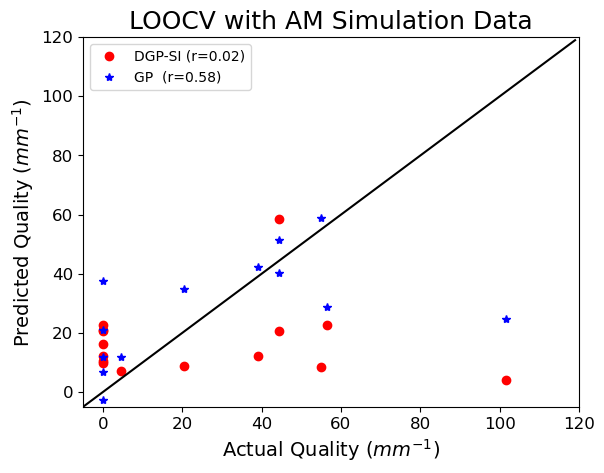

In [42]:
fig,ax = plt.subplots()

ax.plot(y_true,y_pred_DGP,'ro',label = 'DGP-SI (r=0.02)')
ax.plot(y_true,y_pred_GP,'b*',label='GP  (r=0.58)')
ax.plot(np.arange(-5,120),np.arange(-5,120),'k')
ax.set_xlim([-5,120])
ax.set_ylim([-5,120])
ax.legend()

# ax.set_yscale('log')
ax.set_ylabel('Predicted Quality ($mm^{-1}$)',fontsize = 14)
ax.set_xlabel('Actual Quality ($mm^{-1}$)',fontsize=14)
ax.set_title('LOOCV with AM Simulation Data',fontsize = 18)
ax.tick_params(axis = 'x',labelsize = 12)
ax.tick_params(axis = 'y',labelsize = 12)

plt.savefig('AM_Corr.pdf', format='pdf',pad_inches=0)